# Práctico 7 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

from tp7_functions import *

%matplotlib inline

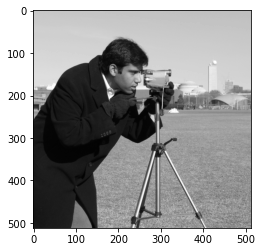

In [17]:
img = imageio.imread('imageio:camera.png')/255

plt.imshow(img, 'gray')

# Remuestreo, reconstrucción y cuantización

Para cada uno de los siguientes incisos, definir una función que haga las tareas especificadas sobre una imagen en escala de grises.

## 1. Upsampling / Downsampling x2

### 1.1. Definir una función que haga un downsampling x2 de la imagen de entrada utilizando los siguientes métodos:

1. Sampling cada 2 pixeles
2. Promedio de una cuadrícula de 2x2
3. Filtro gaussiano + sampling cada 2 pixeles

### 1.2. Definir una función que haga un upsampling x2 de la imagen de entrada utilizando los siguientes métodos:

1. Repetir pixeles en una grilla de 2x2
2. Interpolación bilineal
3. Interpolación bicúbica
4. Repetir pixeles en una grilla de 2x2 y aplicar filtro gaussiano

## 2. Upsampling / Downsampling arbitrario usando FFT

1. Upsampling: Calcular la transformada de Fourier de la imagen, agregar un padding de ceros alrededor del espectro para obtener el tamaño de imagen deseado y antitransformar el espectro con padding
2. Downsampling: Calcular la transformada de Fourier de la imagen, recortar los bordes del espectro al tamaño deseado y antitransformar el espectro recortado

## 3. Cuantización

Cuantizar los niveles de grises de la imagen utilizando los siguientes métodos:

1. Cuantización uniforme
2. Difusión del error por scanline
3. Dithering de Floyd-Steinberg

## 1.1. Downsampling

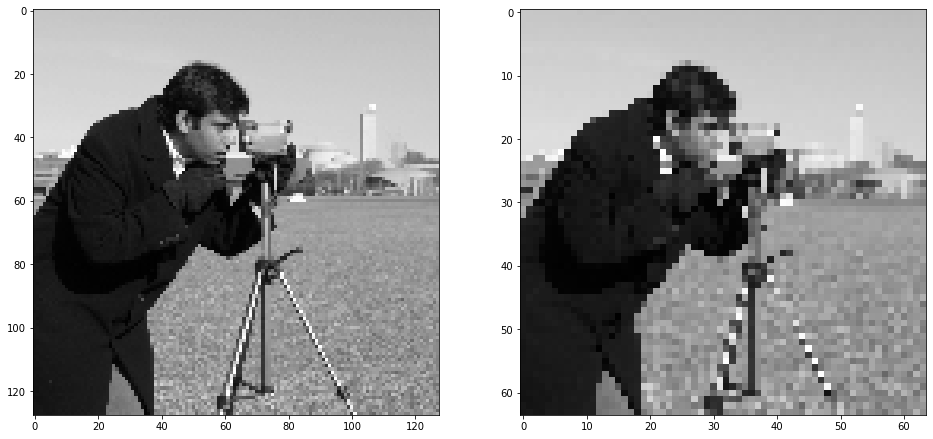

In [22]:
img2 = nn_downsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

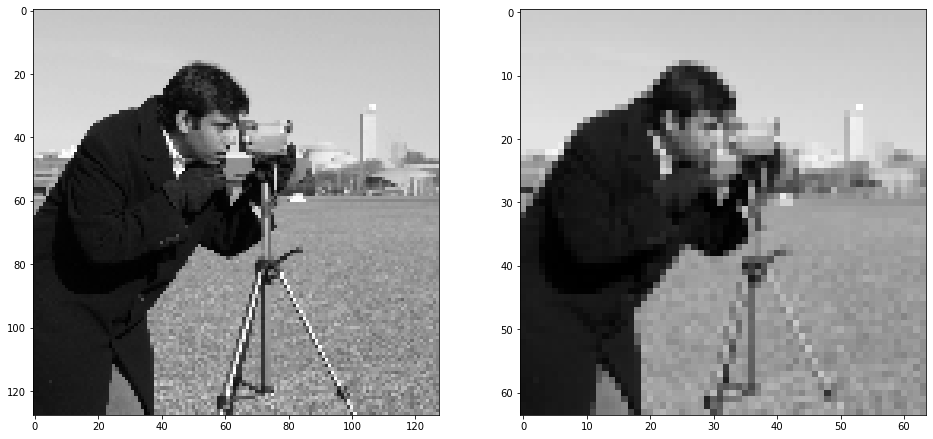

In [23]:
img2 = avg_downsampling_x2(img)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

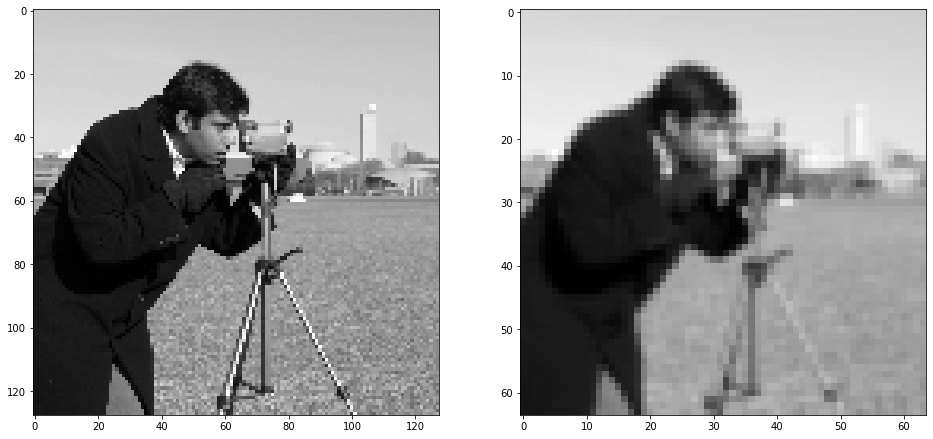

In [26]:
img2 = gaussian_nn_downsampling_x2(img, std=1)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

## 1.2. Upsampling

In [6]:
img2 = nn_downsampling_x2(nn_downsampling_x2(img))

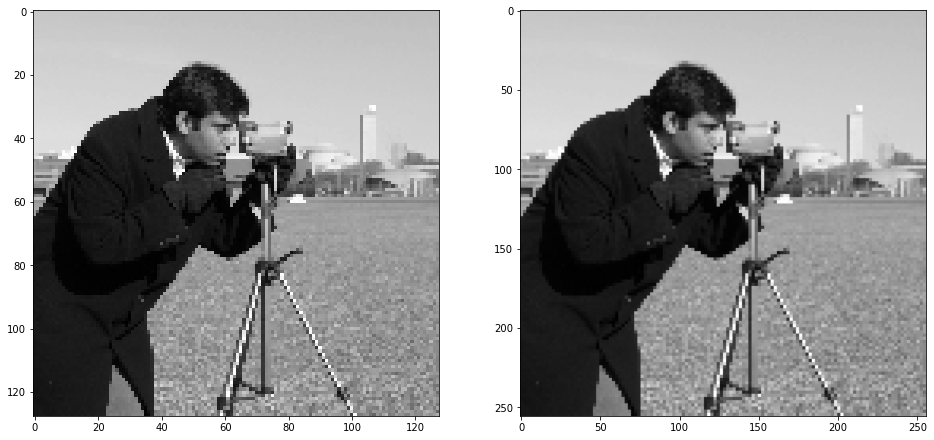

In [28]:
img3 = nn_upsampling_x2(img2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img3, 'gray')

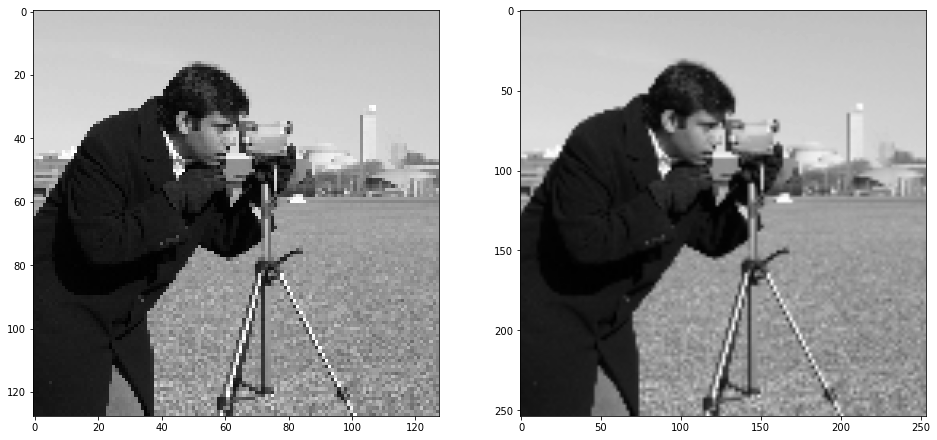

In [8]:
img3 = bilinear_upsampling_x2(img2)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img3, 'gray')

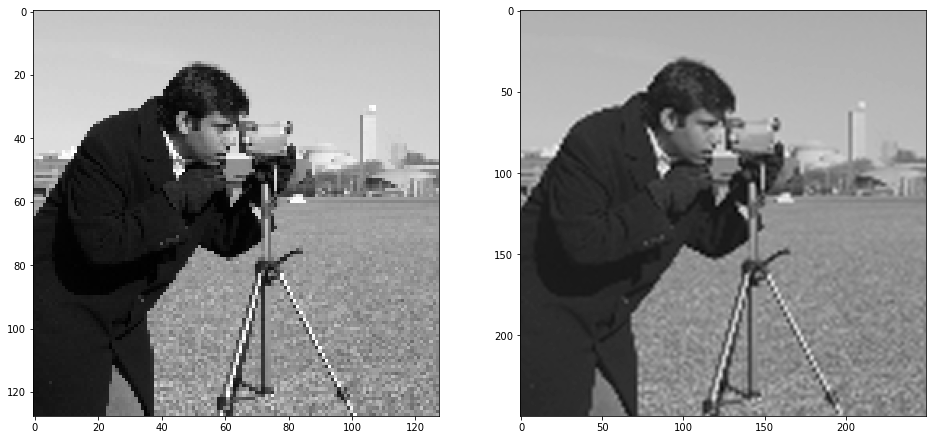

In [9]:
img3 = bicubic_upsampling_x2(img2)

[-1/8, 0, 5/8, 1, 5/8, 0, -1/8]

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img3, 'gray')

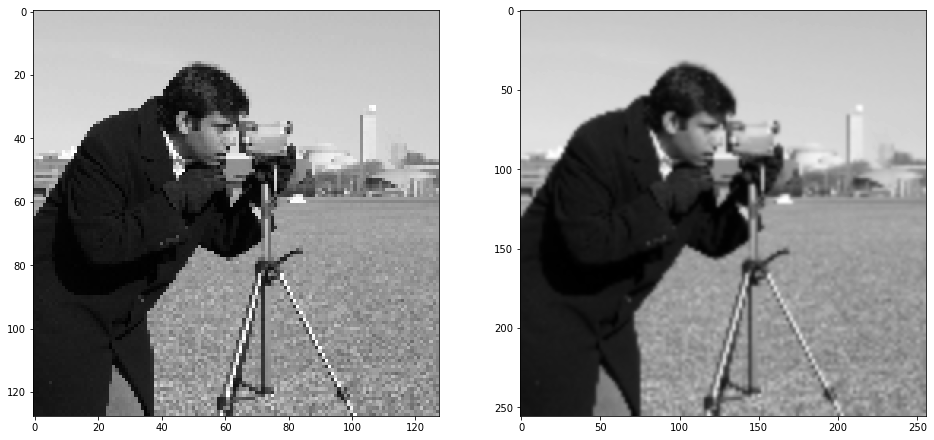

In [10]:
from skimage.filters import gaussian

img3 = nn_upsampling_x2(img2)
img3 = gaussian(img3, sigma=0.8, mode='reflect')

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img2, 'gray')
axes[1].imshow(img3, 'gray')

## 2. Downsampling/Upsampling usando FFT

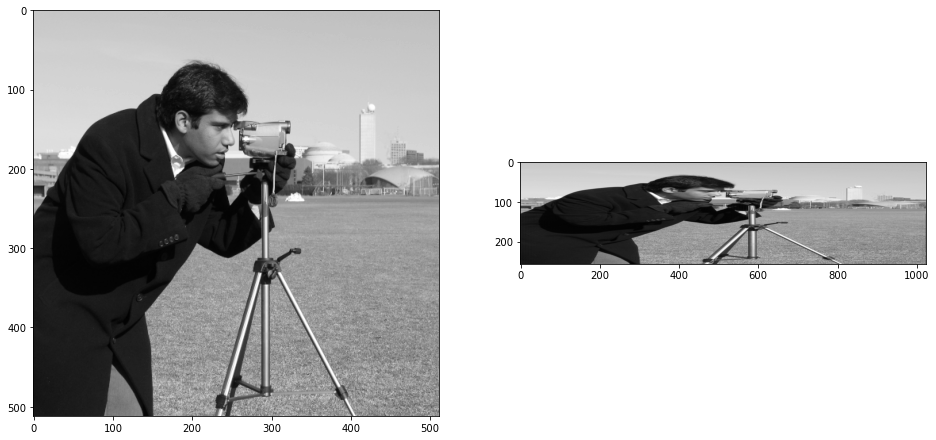

In [11]:
new_shape = (img.shape[0]//2, img.shape[1]*2)

img2 = fft_resampling(img, new_shape)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

## 3. Cuantización

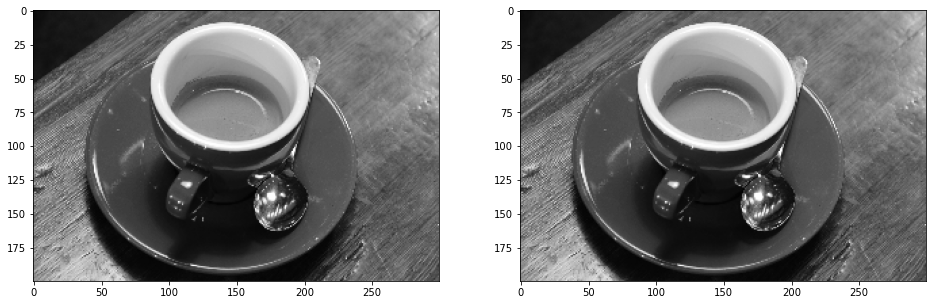

In [29]:
img = imageio.imread('imageio:coffee.png').mean(axis=2)/255
img = nn_downsampling_x2(img)

levels = 4

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img, 'gray')

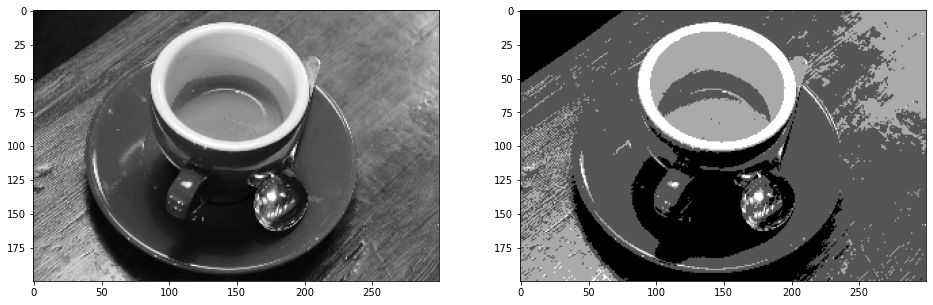

In [30]:
img2 = cuantize_uniform(img, levels)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

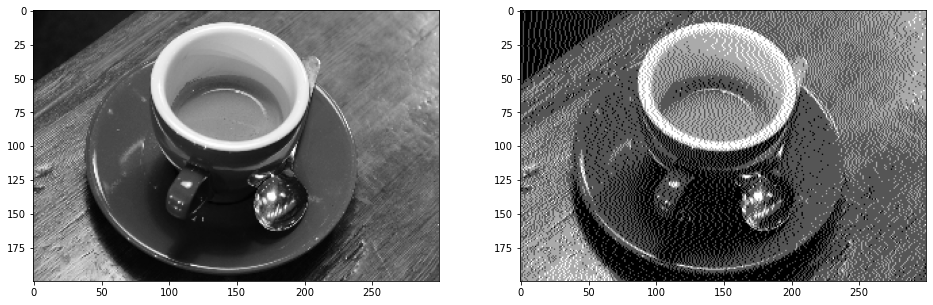

In [31]:
img2 = cuantize_dithering_scanline(img, levels)

fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')

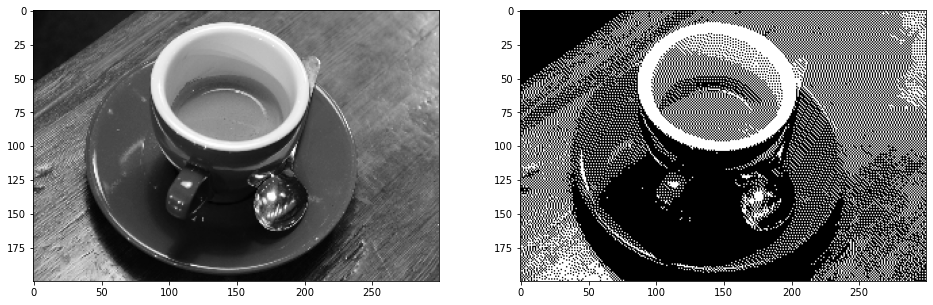

In [32]:
img2 = cuantize_floyd_steinberg(img, 2)
            
fig, axes = plt.subplots(1, 2, figsize=(16,8))
axes[0].imshow(img, 'gray')
axes[1].imshow(img2, 'gray')